
##**1. Implement and Visualize Activation Functions**

###**a. Step Function**
The Step Function outputs 1 if the input is greater than or equal to a certain threshold (usually 0), and outputs 0 otherwise.

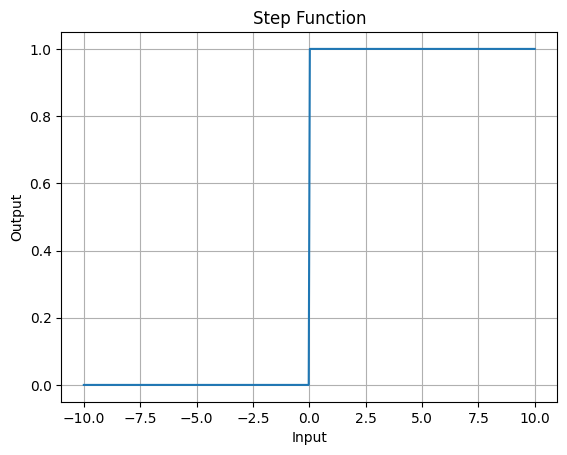

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step function implementation
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Visualization of step function
x_vals = np.linspace(-10, 10, 400)
y_vals = step_function(x_vals)

plt.plot(x_vals, y_vals, label="Step Function")
plt.title("Step Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()


###**b. Sigmoid Function (Binary and Bipolar)**
The Sigmoid Function outputs values between 0 and 1 and is often used for binary classification tasks.



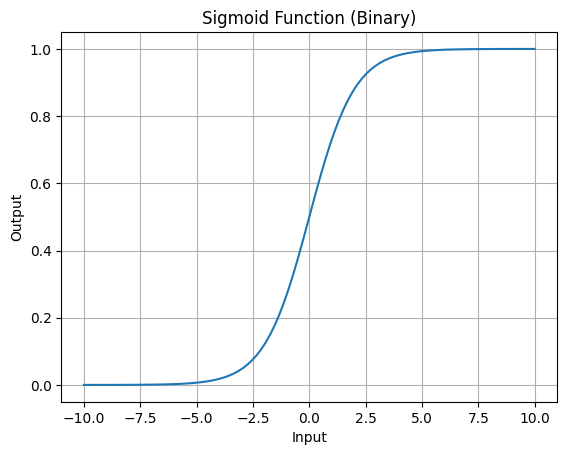

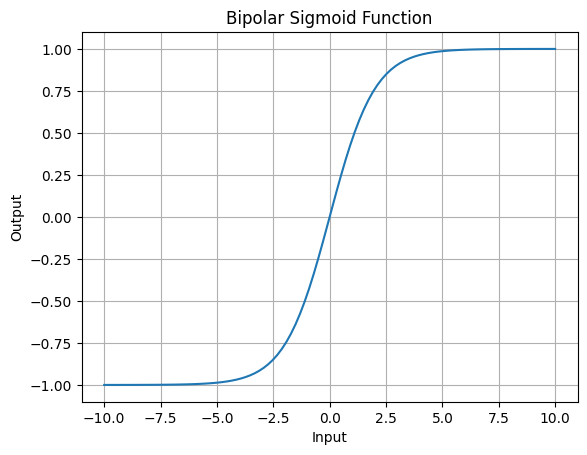

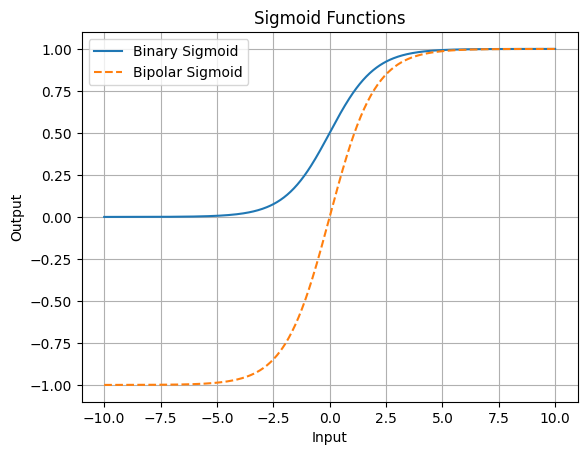

In [ ]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Visualization
y_sigmoid = sigmoid_function(x)

plt.plot(x, y_sigmoid)
plt.title('Sigmoid Function (Binary)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()



def bipolar_sigmoid_function(x):
    return (2 / (1 + np.exp(-x))) - 1

# Visualization
y_bipolar_sigmoid = bipolar_sigmoid_function(x)

plt.plot(x, y_bipolar_sigmoid)
plt.title('Bipolar Sigmoid Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()



# Sigmoid (Binary) function implementation
def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid (Bipolar) function implementation
def sigmoid_bipolar(x):
    return (2 / (1 + np.exp(-x))) - 1

# Visualization
y_sigmoid_binary = sigmoid_binary(x_vals)
y_sigmoid_bipolar = sigmoid_bipolar(x_vals)

plt.plot(x_vals, y_sigmoid_binary, label="Binary Sigmoid")
plt.plot(x_vals, y_sigmoid_bipolar, label="Bipolar Sigmoid", linestyle='dashed')
plt.title("Sigmoid Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

###**C. Tanh Function**

The Tanh Function outputs values between -1 and 1 and is a scaled version of the sigmoid function.

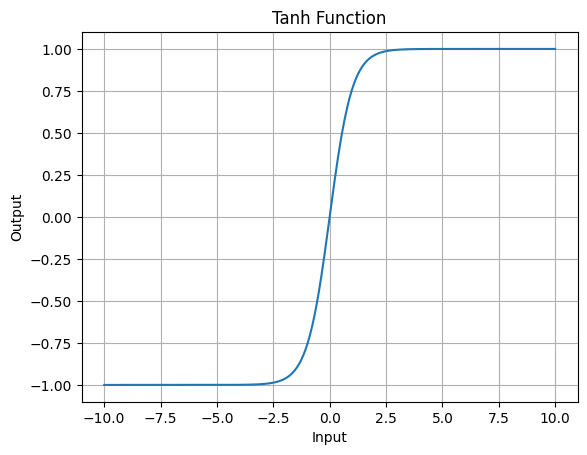

In [ ]:
# Tanh function implementation
def tanh(x):
    return np.tanh(x)

# Visualization
y_tanh = tanh(x_vals)

plt.plot(x_vals, y_tanh, label="Tanh Function")
plt.title("Tanh Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()


###**d. ReLU Function**

The ReLU (Rectified Linear Unit) function outputs 0 for negative inputs and outputs the input itself for positive inputs.

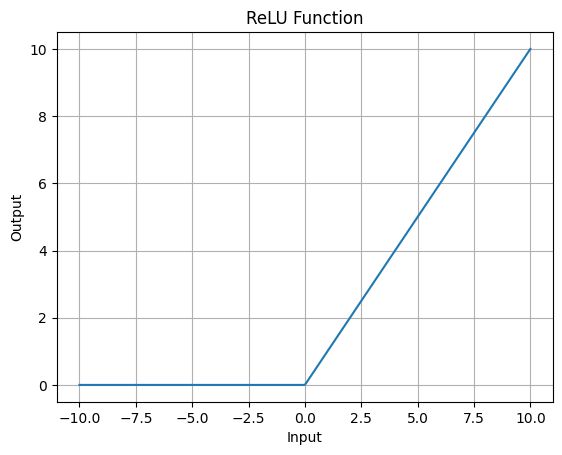

In [ ]:
# ReLU function implementation
def relu(x):
    return np.maximum(0, x)

# Visualization
y_relu = relu(x_vals)

plt.plot(x_vals, y_relu, label="ReLU Function")
plt.title("ReLU Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

##**2. Implement a Simple Neural Network**

We will create a simple feedforward neural network with one hidden layer and compare the performance of different activation functions on the XOR binary classification task.



###**a. Generating XOR dataset**

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])  # XOR labels


###**b. Neural Network Implementation**
We will implement a simple neural network using the sigmoid, tanh, and ReLU functions and evaluate their performance on the XOR problem.

####**Load and Preprocess the Iris Dataset**

In [4]:
! pip install tensorflow
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert the problem into binary classification by selecting only two classes (Setosa and Versicolor)
# We'll select class 0 (setosa) and class 1 (versicolor)
X = X[y != 2]
y = y[y != 2]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


###**c. Build Neural Network**



In [6]:
# Import the necessary libraries from TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Define the new build_and_train_model function for the Iris dataset
def build_and_train_model_iris(activation_func):
    # Build the model
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation=activation_func))  # 4 input features (Iris dataset)
    model.add(Dense(1, activation='sigmoid'))  # Binary output for classification

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, verbose=0)

    # Evaluate the model on the test data
    predictions = model.predict(X_test)
    predictions = (predictions > 0.5).astype(int)

    acc = accuracy_score(y_test, predictions)
    print(f'Accuracy with {activation_func}: {acc * 100:.2f}%')

    return history

# Train with different activation functions
print("Training with Sigmoid Activation")
history_sigmoid = build_and_train_model_iris('sigmoid')

print("\nTraining with Tanh Activation")
history_tanh = build_and_train_model_iris('tanh')

print("\nTraining with ReLU Activation")
history_relu = build_and_train_model_iris('relu')


Training with Sigmoid Activation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Accuracy with sigmoid: 100.00%

Training with Tanh Activation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Accuracy with tanh: 100.00%

Training with ReLU Activation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Accuracy with relu: 100.00%


###**d. Train and Compare Activation Functions, with Visualization of Training**



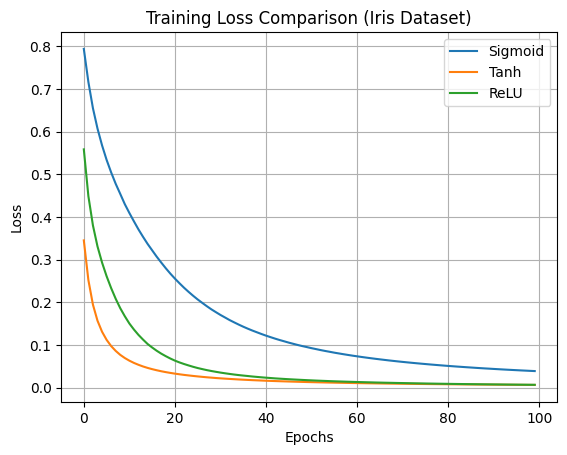

In [8]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt

# Plotting training loss for different activation functions
plt.plot(history_sigmoid.history['loss'], label='Sigmoid')
plt.plot(history_tanh.history['loss'], label='Tanh')
plt.plot(history_relu.history['loss'], label='ReLU')
plt.title('Training Loss Comparison (Iris Dataset)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

###**Additional Method (MLP Classifier for Iris Dataset)**

In [9]:
from sklearn.neural_network import MLPClassifier

# Function to create and train a neural network on Iris data
def train_nn_iris(activation_function):
    nn = MLPClassifier(hidden_layer_sizes=(8,), activation=activation_function, max_iter=1000, solver='lbfgs', random_state=42)
    nn.fit(X_train, y_train)
    return nn

# Train networks using different activation functions
nn_sigmoid = train_nn_iris('logistic')  # Logistic sigmoid
nn_tanh = train_nn_iris('tanh')         # Tanh activation
nn_relu = train_nn_iris('relu')         # ReLU activation

# Test on the test dataset
y_pred_sigmoid = nn_sigmoid.predict(X_test)
y_pred_tanh = nn_tanh.predict(X_test)
y_pred_relu = nn_relu.predict(X_test)

# Output the accuracy
print(f"Sigmoid Activation Accuracy: {accuracy_score(y_test, y_pred_sigmoid) * 100:.2f}%")
print(f"Tanh Activation Accuracy: {accuracy_score(y_test, y_pred_tanh) * 100:.2f}%")
print(f"ReLU Activation Accuracy: {accuracy_score(y_test, y_pred_relu) * 100:.2f}%")


Sigmoid Activation Accuracy: 100.00%
Tanh Activation Accuracy: 100.00%
ReLU Activation Accuracy: 100.00%


##**3. Performance Comparison**
* Sigmoid Activation: This function often struggles with XOR problems due to the vanishing gradient problem in deeper networks. Accuracy might be lower.

* Tanh Activation: Similar to sigmoid but maps inputs between -1 and 1. It generally performs better than sigmoid for XOR problems due to its zero-centered nature.

* ReLU Activation: ReLU can perform well for binary classification tasks but may struggle with small datasets like XOR due to its nature of producing a lot of zero gradients for negative inputs.



##**4. Conclusion**

Activation functions play a crucial role in the learning process of neural networks. Their characteristics, such as handling of non-linearity, gradient flow, and range of outputs, significantly affect model performance. For small problems like XOR:

* Sigmoid often struggles with convergence.
* Tanh performs better due to its wider output range.
* ReLU, while powerful in deep networks, can have mixed results for small datasets like XOR.